# SEANCE 5 - Les statistiques bivariées (à 2 variablesà et statistiques inférentielles

## Pourquoi la statistique bivariée ?

La statistique bivariée permet d’étudier le **lien entre deux variables mesurées simultanément**.

En ingénierie, cela correspond par exemple à :
- effort ↔ déformation,
- vitesse ↔ consommation,
- température ↔ durée de vie,
- masse ↔ résistance.

L’objectif est de déterminer :
- s’il existe une relation,
- sa nature (positive, négative, inexistante),
- son intensité.



### Exemple de contexte

- Variable X : température de fonctionnement (°C)

- Variable Y : durée de vie d’un composant (heures)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
#création de valeurs aléatoires pour la température en utilisant une répartition normale
temperature = np.random.normal(70, 5, 40)
#artificiellement on crée des valeurs aléatoire de durée de vie liée à la température
duree_vie = 2000 - 15 * temperature + np.random.normal(0, 50, 40)
#création du tableau des deux variables
df = pd.DataFrame({
    "Température (°C)": temperature,
    "Durée de vie (h)": duree_vie
})

df.head()


,Température (°C),Durée de vie (h)
0,78.820262,765.268426
1,72.000786,848.987313
2,74.893690,791.281142
3,81.204466,879.471780
4,79.337790,784.450542


## Nuage de points

Le nuage de points permet de visualiser la relation entre deux variables quantitatives.

Il permet de détecter :
- une relation croissante,
- une relation décroissante,
- l’absence de relation,
- des valeurs aberrantes.


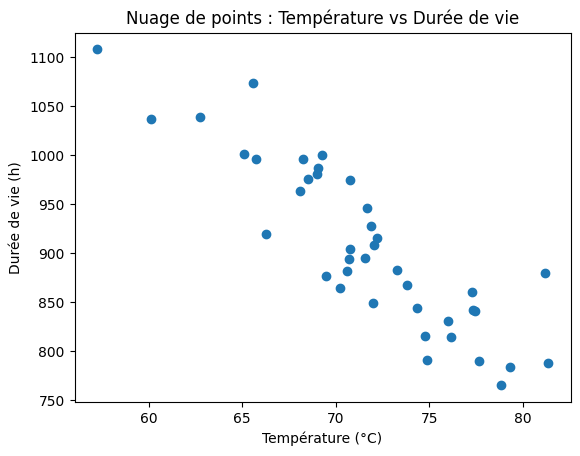

In [ ]:
#on règle les paramètres du nuage de point avant de l'afficher
plt.scatter(df["Température (°C)"], df["Durée de vie (h)"])#déclaration des données en abscisse et ordonnée
plt.xlabel("Température (°C)") #ce qu'on veut afficher sous l'axe des abscisses
plt.ylabel("Durée de vie (h)") #ce qu'on veut afficher le long de l'axe des ordonnées
plt.title("Nuage de points : Température vs Durée de vie") #tittre du graphique
plt.show() #affichage du graphique


# Droite de régression linéaire (régression linéaire simple)
On observe que le nuage de point semble est réparti autour d'une droite.
On va donc chercher la droite qui passe au plus proche de tous les points.

## Objectif
Décrire et quantifier la relation entre deux variables quantitatives :
- \(x\) : variable explicative (ex. contrainte, vitesse, température…)
- \(y\) : variable réponse (ex. déformation, usure, perte de charge…)

On cherche une relation de la forme :
$$
y = a + b\,x + \varepsilon
$$
- \(a\) : intercept (valeur prédite quand \(x=0\))
- \(b\) : pente (sensibilité de \(y\) à \(x\), **avec unités** : unité(y)/unité(x))
- \($\varepsilon$\) : bruit / variabilité non expliquée

---

##  Principe de l’ajustement (moindres carrés)
La droite de régression est choisie pour minimiser la somme des carrés des résidus :
$$
\sum_{i=1}^n (y_i - \hat{y}_i)^2
\quad \text{avec} \quad \hat{y}_i = a + b x_i
$$
Le résidu \($e_i$ = $y_i$ - $\hat{y}_i$\) représente l’écart entre la mesure et le modèle.

<details>
<summary><b>Afficher explications calculs de a et b</b></summary>
## Comment sont calculés les coefficients de la droite de régression ?

On cherche à modéliser la relation entre deux variables quantitatives par une droite :
$$
y = a + b\,x
$$

où :
- $a$ est l’**intercept**
- $b$ est la pente (**sensibilité** de \(y\) à \(x\))

---

## 1. Intuition : la méthode des moindres carrés

Pour chaque point mesuré $(x_i, y_i)$, le modèle prédit :
$$
\hat{y}_i = a + b x_i
$$

L’écart entre la mesure et le modèle est appelé **résidu** :
$$
e_i = y_i - \hat{y}_i
$$

L’idée des moindres carrés est simple :
> choisir $a$ et $b$ pour que les résidus soient globalement les plus petits possibles

Concrètement, on minimise la somme des carrés des résidus :
$$
\sum_{i=1}^{n} e_i^2
= \sum_{i=1}^{n} \left(y_i - a - b x_i\right)^2
$$

Pourquoi des carrés ?
- pour éviter les compensations entre erreurs positives et négatives
- pour pénaliser davantage les grandes erreurs
- pour obtenir une solution mathématique unique et stable

---

## 2. Formules clés

Sans entrer dans les détails du calcul, la méthode des moindres carrés conduit aux résultats suivants.

### Pente $b$
$$
b = \frac{\mathrm{cov}(x,y)}{\mathrm{var}(x)}
$$

La pente est directement liée à la corrélation :
$$
b = r \,\frac{s_y}{s_x}
$$

où :
- $r$ est le coefficient de corrélation de Pearson
- $s_x$, $s_y$ sont les écarts-types de $x$ et $y$

---

### Intercept $a$
$$
a = \bar{y} - b\,\bar{x}
$$

Conséquence importante :
> la droite de régression passe toujours par le point moyen $(\bar{x}, \bar{y})$

---

## 3. Interprétation en ingénierie

- La pente $b$ a une **unité physique** : unité de $y$ / unité de $x$.
- Elle représente une **sensibilité moyenne** du système.
- Une pente non nulle indique un lien linéaire, mais pas nécessairement une causalité.

La droite de régression :
- décrit une tendance moyenne
- ne passe pas nécessairement par les points mesurés
- n’explique jamais 100 % de la variabilité réelle

---



## Message clé à retenir

> La droite de régression n’est pas choisie “à l’œil”.  
> Elle est la solution d’un problème d’optimisation qui minimise l’erreur globale.

</details>

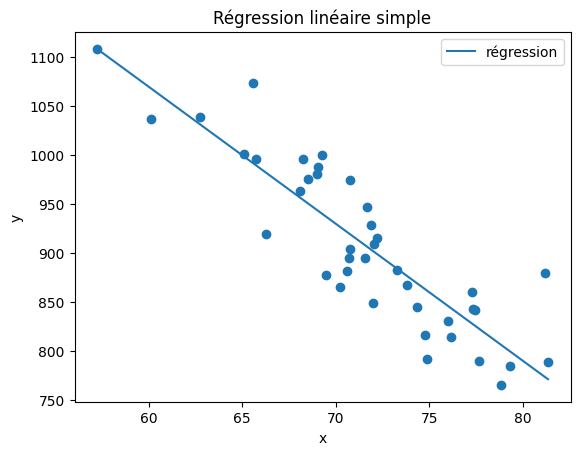

In [ ]:
from scipy import stats
import statsmodels.api as sm

X = sm.add_constant(df["Température (°C)"])     # ajoute la colonne constante pour l'intercept
model = sm.OLS(df["Durée de vie (h)"], X).fit() #utilise la méthode des moindres carré (Odinary Least Square)
model.summary()
x_grid = np.linspace(df["Température (°C)"].min(), df["Température (°C)"].max(), 200)
Xg = sm.add_constant(x_grid)
y_hat = model.predict(Xg)

plt.figure()
plt.scatter(df["Température (°C)"], df["Durée de vie (h)"])
plt.plot(x_grid, y_hat, label="régression") #trace la droite de régression
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression linéaire simple")
plt.legend()
plt.show()


## Interprétation du coefficient de corrélation linéaire

Le **coefficient de corrélation linéaire de Pearson**, noté $r$, mesure la **force et le sens du lien linéaire** entre deux variables quantitatives.

Sa valeur est comprise entre **−1 et 1**.

Soient deux variables quantitatives \(X\) et \(Y\), observées sur \(n\) couples de données \((x_i, y_i)\).

Le **coefficient de corrélation linéaire de Pearson**, noté \(r\), est défini par :

$$
r = \frac{\mathrm{Cov}(X,Y)}{\sigma_X \, \sigma_Y}
$$

où :
- $\mathrm{Cov}(X,Y)$ est la **covariance** entre \(X\) et \(Y\),
- $\sigma_X$ et $\sigma_Y$ sont les **écarts-types** de \(X\) et \(Y\).


---
---

### Formule développée

$$
r =
\frac{
\displaystyle \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
}{
\sqrt{\displaystyle \sum_{i=1}^{n} (x_i - \bar{x})^2}
\;
\sqrt{\displaystyle \sum_{i=1}^{n} (y_i - \bar{y})^2}
}
$$

avec :
- $\bar{x}$ : moyenne de la variable \(X\),
- $\bar{y}$ : moyenne de la variable \(Y\).

---

### $r$ proche de 1 — Corrélation positive forte

Lorsque $r$ est proche de 1 :

- les deux variables **évoluent dans le même sens** ;
- lorsque l’une augmente, l’autre a tendance à augmenter également ;
- les points du nuage sont **alignés autour d’une droite croissante**.

**Exemples industriels :**
- vitesse de rotation ↔ consommation d’énergie,
- charge appliquée ↔ déformation,
- température ↔ dilatation d’un matériau.

👉 **Interprétation ingénieur :**  
il existe un lien linéaire fort ; une modélisation par une relation linéaire peut être pertinente.

---

### $r$ proche de −1 — Corrélation négative forte

Lorsque $r$ est proche de −1 :

- les deux variables évoluent **en sens opposé** ;
- lorsque l’une augmente, l’autre diminue ;
- les points sont alignés autour d’une **droite décroissante**.

**Exemples industriels :**
- température ↔ durée de vie d’un composant,
- vitesse ↔ temps de réponse,
- distance à la source ↔ intensité du signal.

👉 **Interprétation ingénieur :**  
une augmentation d’un paramètre entraîne une diminution systématique de l’autre.

---

### $r$ proche de 0 — Absence de corrélation linéaire

Lorsque $r$ est proche de 0 :

- il n’y a **pas de relation linéaire apparente** entre les deux variables ;
- le nuage de points ne présente **aucune tendance linéaire claire**.

⚠️ **Attention importante :**
- $r \approx 0$ ne signifie **pas nécessairement** qu’il n’existe aucun lien,
- il peut exister une **relation non linéaire** (quadratique, exponentielle, seuil, etc.).

**Exemple :**
- $Y = X^2$ → corrélation linéaire proche de 0, mais lien réel fort.

👉 **Réflexe ingénieur :**  
toujours regarder le **nuage de points** avant de conclure.

---

### Ordres de grandeur (repères pratiques)

| Valeur de $|r|$ | Interprétation |
|-----------|----------------|
| $< 0{,}2$ | Corrélation très faible |
| $0{,}2$ – $0{,}5$ | Corrélation faible à modérée |
| $0{,}5$ – $0{,}8$ | Corrélation forte |
| $> 0{,}8$ | Corrélation très forte |

Ces seuils sont indicatifs et dépendent du domaine d’application.

---

### Message clé

> *La corrélation mesure un lien linéaire,  
pas une relation de cause à effet.*

Toute conclusion doit être appuyée par :
- le contexte physique,
- le nuage de points,
- et l’expertise métier.


In [ ]:
cov = df.cov() #calcul de la covariance
corr = df.corr() #calcul du coefficient de corrélation linéaire

cov, corr


(                  Température (°C)  Durée de vie (h)
 Température (°C)         29.046322       -405.955372
 Durée de vie (h)       -405.955372       7326.179339,
                   Température (°C)  Durée de vie (h)
 Température (°C)          1.000000         -0.880023
 Durée de vie (h)         -0.880023          1.000000)

## Interprétation des matrices de covariance et de corrélation

Les fonctions `df.cov()` et `df.corr()` renvoient des **matrices** qui décrivent les relations entre les variables étudiées.

---

### Matrice de covariance

$$
\begin{pmatrix}
29{,}05 & -405{,}96 \\
-405{,}96 & 7326{,}18
\end{pmatrix}
$$

#### Diagonale principale
- **Cov(Température, Température) = 29,05**  
  correspond à la **variance de la température**.  
  Elle mesure la dispersion des températures autour de leur moyenne.

- **Cov(Durée de vie, Durée de vie) = 7326,18**  
  correspond à la **variance de la durée de vie**.  
  La valeur élevée traduit une forte dispersion des durées de vie (unités en heures²).

👉 Sur la diagonale d’une matrice de covariance, on trouve toujours les **variances**.

---

#### Hors diagonale
- **Cov(Température, Durée de vie) = −405,96**

Cette covariance négative indique que les deux variables évoluent **en sens opposé** :
lorsque la température augmente, la durée de vie tend à diminuer.

La matrice est **symétrique** :
$$
\mathrm{Cov}(X,Y) = \mathrm{Cov}(Y,X)
$$

---

### Matrice de corrélation

$$
\begin{pmatrix}
1 & -0{,}88 \\
-0{,}88 & 1
\end{pmatrix}
$$

#### Diagonale principale
- **Corr(Température, Température) = 1**
- **Corr(Durée de vie, Durée de vie) = 1**

Chaque variable est parfaitement corrélée avec elle-même.

---

#### Hors diagonale
- **Corr(Température, Durée de vie) = −0,88**

Cette valeur, proche de −1, indique une **corrélation linéaire négative très forte** :
plus la température de fonctionnement est élevée, plus la durée de vie du composant est faible.

La corrélation est :
- sans unité,
- comprise entre −1 et 1,
- indépendante de l’échelle des variables.

---

### Synthèse

- La **covariance** indique le **sens** de la relation (positive ou négative).
- La **corrélation** indique la **force du lien linéaire**.
- La diagonale contient les **variances** (covariance) ou des **1** (corrélation).
- Les valeurs hors diagonale contiennent l’information sur la relation entre variables.

---

### Message clé

> La covariance donne le sens du lien,  
> la corrélation en donne l’intensité.*


### Résumé Interprétation (ingénieur)

- Le signe de la corrélation est-il cohérent avec le phénomène physique ?
- La relation est-elle forte ou faible ?
- Peut-on parler de lien causal ?


## Exercice de synthèse (PARTIE 2)— Analyse statistique avant modélisation

On réalise une étude pour savoir si un des composés ou propriétés chimiques ont une relation de corrélation forte.

---
### Partie 1 : Charger des données publiques réelles

UCI Machine Learning REpository : (https://archive.ics.uci.edu/dataset/186/wine+quality)
Pour étudier la corrélation de paramètres dans la qualité du vin
Extraire le fichier csv pour le vin rouge(ou blanc) et choisir deux colonnes parmi les données pour faire l'étude statistique de corrélation

### Partie 1 — Statistiques descriptives à une variable

1) Calculer pour chaque variable :
- la moyenne,
- la médiane,
- l’écart-type,
- les quartiles.

2) Représenter graphiquement chaque variable :
- histogramme,
- diagramme en moustache.

**Questions d’interprétation :**
- Les distributions sont-elles symétriques ?
- La moyenne est-elle représentative des données ?
- Quelle variable présente la plus forte dispersion ?

---

### Partie 2 — Analyse conjointe des variables

3) Tracer le **nuage de points** $Y$ en fonction de $X$.
4) Tracer sa droite de régression linéaire

**Questions d’interprétation :**
- Existe-t-il une relation apparente entre les deux variables ?
- Le lien semble-t-il croissant, décroissant ou nul ?
- Observe-t-on des valeurs atypiques ?

---

### Partie 3 — Covariance

5) Calculer la **covariance** entre les deux variables.

**Questions d’interprétation :**
- Le signe de la covariance est-il cohérent avec le nuage de points ?
- Que nous apprend la covariance sur le sens de la relation ?
- Peut-on conclure sur l’intensité du lien à partir de la covariance seule ?

---

### Partie 4 — Corrélation linéaire

6) Calculer le **coefficient de corrélation linéaire de Pearson**.

**Questions d’interprétation :**
- Le lien est-il faible, modéré ou fort ?
- La corrélation confirme-t-elle l’analyse graphique ?
- Peut-on conclure à une relation de cause à effet ?

---

### Partie 5 — Synthèse (raisonnement ingénieur)

7) Rédiger une synthèse (8–10 lignes) répondant aux questions suivantes :
- Les deux variables sont-elles liées ?
- La relation observée est-elle cohérente physiquement ?
- Ces résultats justifient-ils la recherche d’un modèle mathématique reliant \(X\) et \(Y\) ?

👉 Cette synthèse doit s’appuyer sur :
- les statistiques à une variable,
- les graphiques,
- la covariance,
- la corrélation.

---

### Transition

> *Si une relation linéaire forte est observée,  
il devient pertinent de chercher à la modéliser par une régression linéaire.*

C’est l’objet de la séance suivante.

### **A rendre pour le 20/02/26:**
envoyer le lien de partage de votre Notebook à l'adresse : (frederique.beaudeux@univ-lorraine.fr)

